# **<center><font color = "16325B">BGMI Game Prediction - CatBoost Model</font></center>**

<center><img src = "https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif"></center

## **Data Description**

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.-
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

### **Notebook** - **Table of Content**

1. **Importing necessary Libraries**
2. **Loading Data**
3. **Data Wrangling**
4. **Exploratory Data Analysis**
5. **Feature Engineering**
6. **Preparing data - Standardisation and Splitting**
7. **Prediction with CatBoost Model**

## **<font color = "227B94">1. Importing necessary Libraries</font><a class = "anchor" id = "import"></a>**


In [1]:

# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


## **<font color = "227B94">2. Loading Data </font><a class = "anchor" id = "read"></a>**

In [2]:
# load the data
df = pd.read_csv("/PUBG_Game_Prediction_data.csv")

In [3]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [4]:
# data dimension
df.shape

(402964, 29)

In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402964 entries, 0 to 402963
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               402964 non-null  object 
 1   groupId          402964 non-null  object 
 2   matchId          402963 non-null  object 
 3   assists          402963 non-null  float64
 4   boosts           402963 non-null  float64
 5   damageDealt      402963 non-null  float64
 6   DBNOs            402963 non-null  float64
 7   headshotKills    402963 non-null  float64
 8   heals            402963 non-null  float64
 9   killPlace        402963 non-null  float64
 10  killPoints       402963 non-null  float64
 11  kills            402963 non-null  float64
 12  killStreaks      402963 non-null  float64
 13  longestKill      402963 non-null  float64
 14  matchDuration    402963 non-null  float64
 15  matchType        402963 non-null  object 
 16  maxPlace         402963 non-null  floa

## **<font color = "227B94">3. Data Wrangling</font><a class = "anchor" id = "wrangle"></a>**

#### Check for the rows with missing win prediction value

In [6]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
402963,59d1e1918f9f91,ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# remove the data row
df.drop(402963, inplace = True)
# df = df.drop(402963)

#### Understanding Players distribution in a game

In [9]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444,8
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400,14
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755,12
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667,9
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875,10


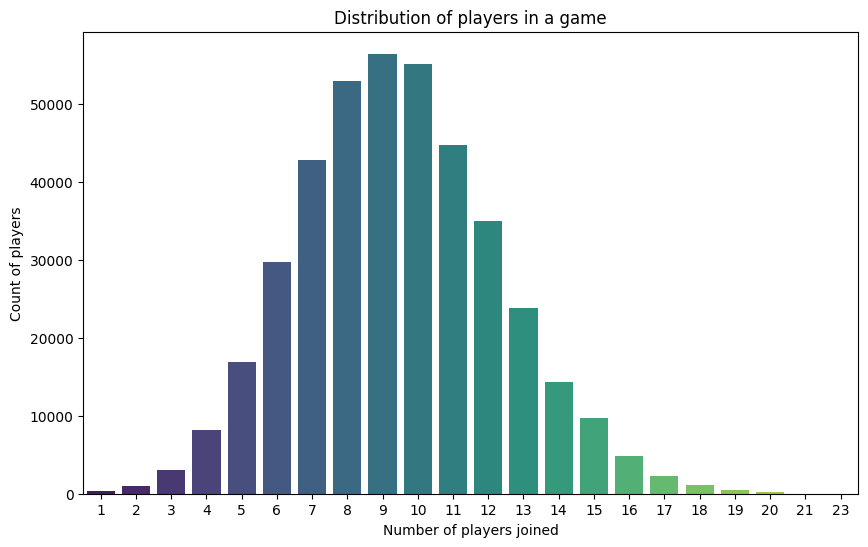

In [16]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(data=df[df['playersJoined'] >= 1], x='playersJoined', palette='viridis').set_title("Distribution of players in a game")
plt.ylabel("Count of players")
plt.xlabel("Number of players joined")
plt.show()

## Analysing the data

##### Kills Without Moving?

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

In [17]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [18]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0.0,0.0,593.0,0.0,0.0,3.0,18.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,7,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2.0,0.0,346.6,0.0,0.0,6.0,33.0,...,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,4,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2.0,0.0,1750.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,3,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0.0,0.0,157.8,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,9,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0.0,0.0,100.0,0.0,1.0,0.0,37.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,4,0.0,True


In [19]:
df[df['killswithoutMoving'] == True].shape

(147, 32)

In [20]:
# drop the table
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [21]:
df[df['roadKills'] > 5].shape

(9, 32)

In [22]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how ????

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

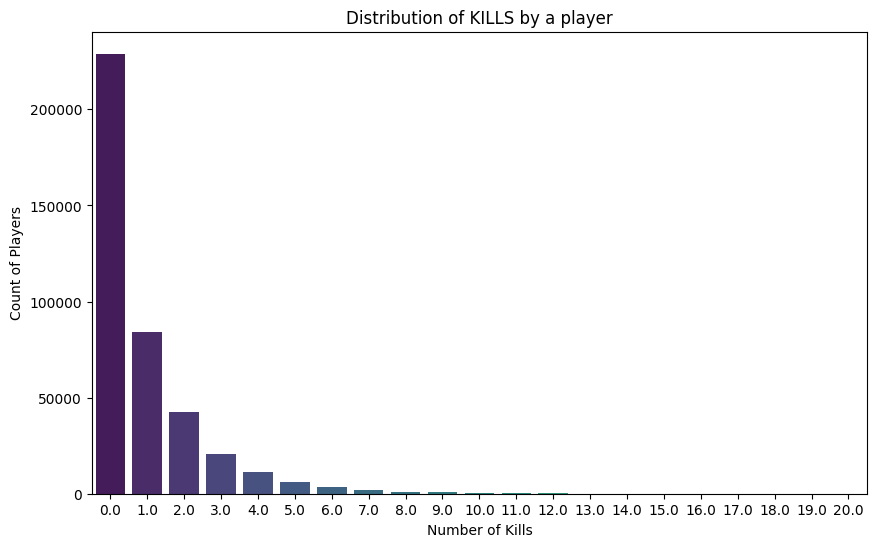

In [72]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(data=df, x='kills', palette='viridis').set_title("Distribution of KILLS by a player")

plt.ylabel("Count of Players")
plt.xlabel("Number of Kills")
plt.show()

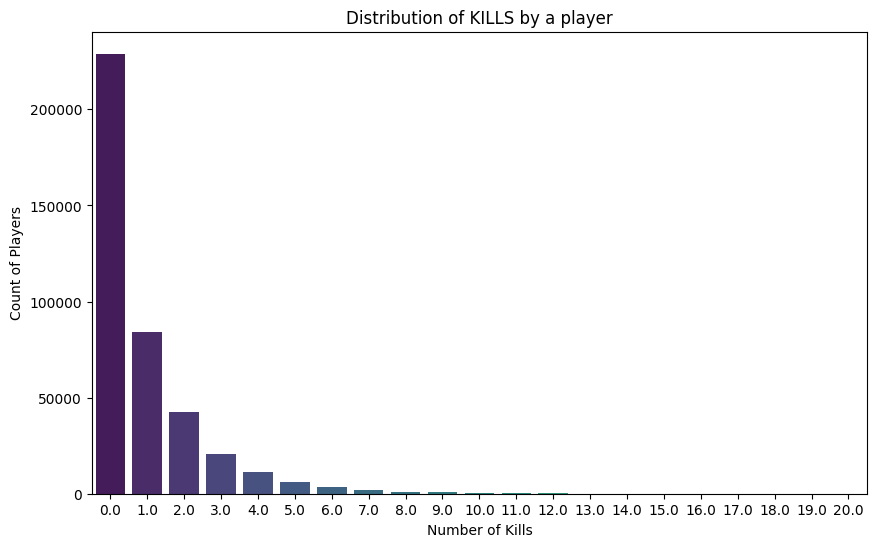

In [73]:
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(data=df, x='kills', palette='viridis').set_title("Distribution of KILLS by a player")

plt.ylabel("Count of Players")
plt.xlabel("Number of Kills")
plt.show()

In [32]:
# data dimension
df[df['kills'] > 20].shape

(41, 32)

In [33]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

#### Head Shot

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

In [34]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

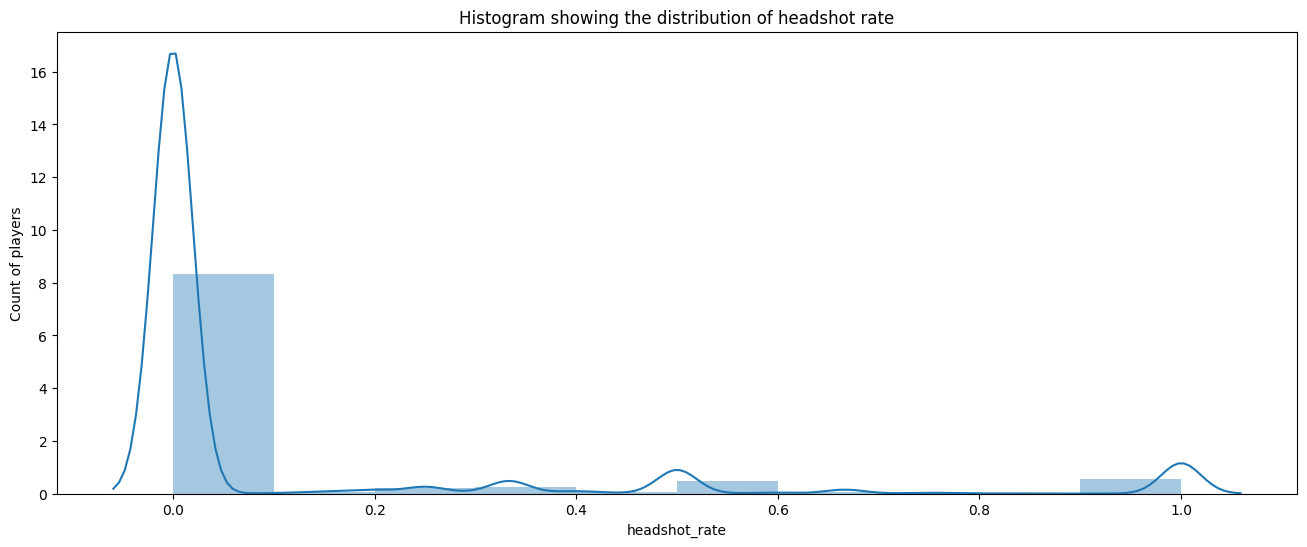

In [35]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [36]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(13, 33)

In [37]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

#### Longest Shot

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

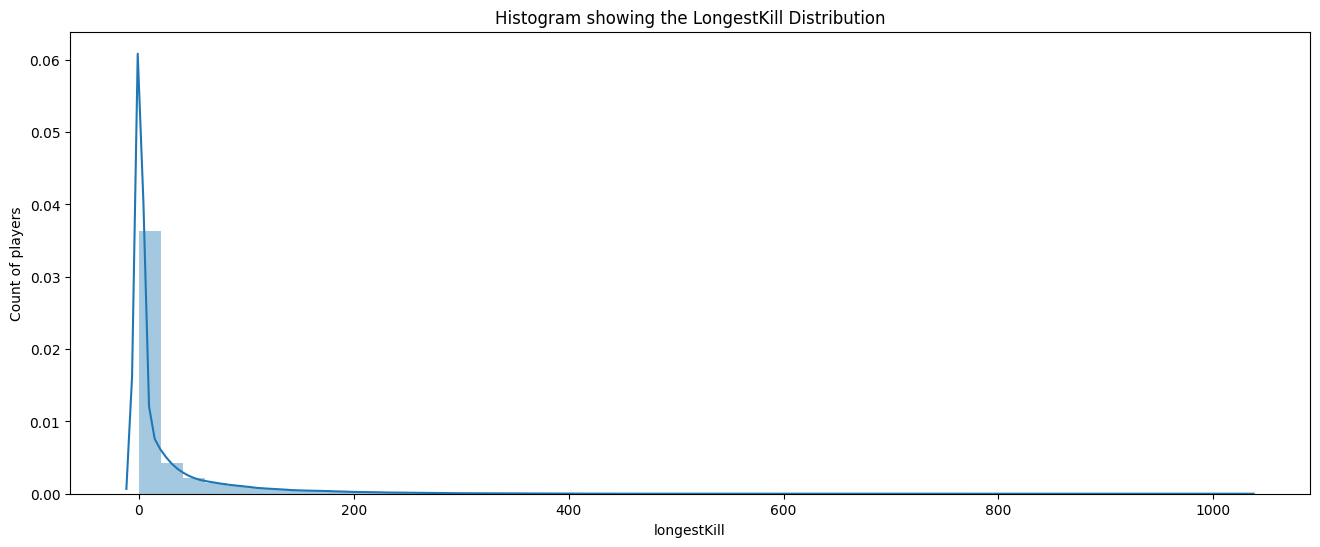

In [38]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [39]:
df[df['longestKill']>=500].shape

(163, 33)

In [40]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

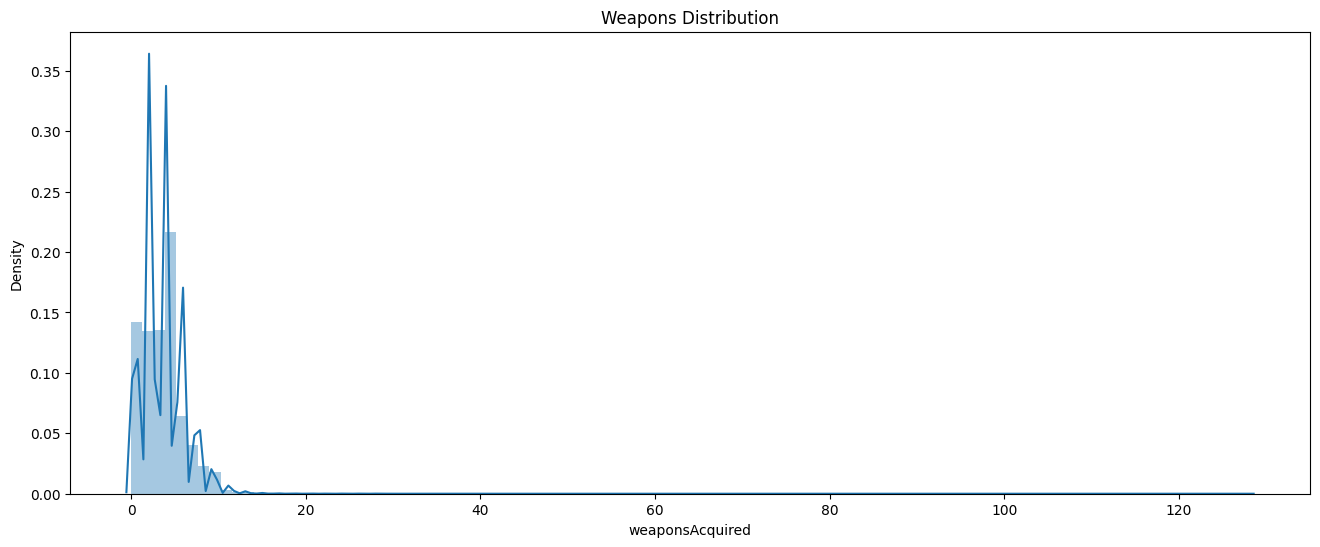

In [41]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [42]:
df[df['weaponsAcquired']>=15].shape

(579, 33)

In [43]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

## **<font color = "227B94">4. Exploratory Data Analysis </font><a class = "anchor" id = "wrangle"></a>**

In [44]:
df.shape

(402015, 33)

In [45]:
df.isna().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


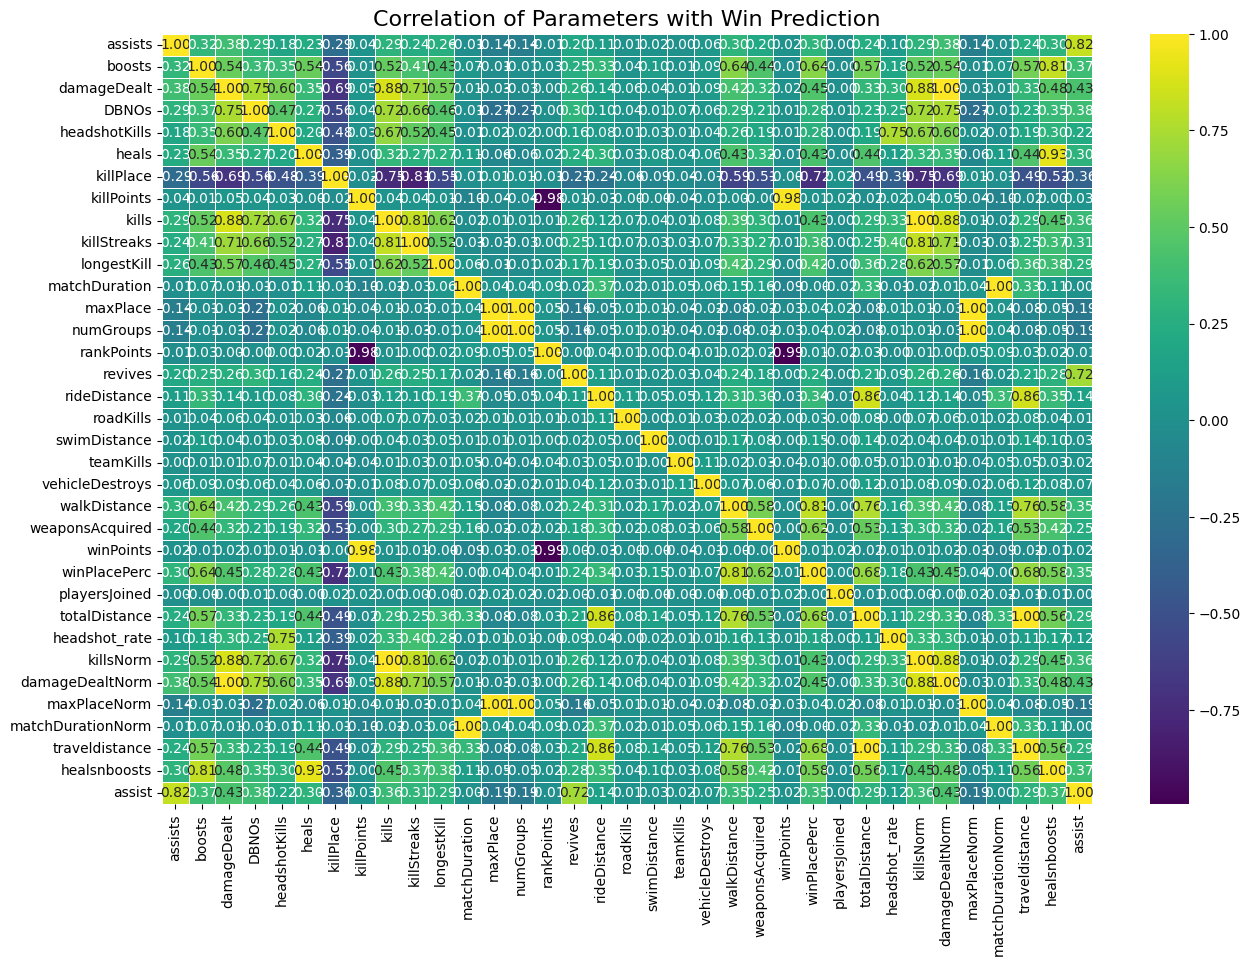

In [74]:
# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Check for any missing values and handle them (e.g., drop rows or fill with a specific value)
df_numeric = df_numeric.dropna()  # Or use df_numeric.fillna(0) or another method for filling

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title("Correlation of Parameters with Win Prediction", fontsize=16)
plt.show()

## **<font color = "227B94">5. Feature Engineering</font><a class = "anchor" id = "feature"></a>**

In [49]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [50]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [51]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [52]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [53]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0.0,0.0,60.0,1241.0,0.0,0.00,squad-fpp,26.0,-1.0,0.0,...,244.8000,False,0.0,0.0,0.0000,2825.76,131801.52,244.8000,0.0,0.0
1,0.0,0.0,57.0,0.0,0.0,0.00,squad-fpp,25.0,1484.0,0.0,...,1445.0445,False,0.0,0.0,9225.6642,2622.36,179228.22,1445.0445,0.0,0.0
2,0.0,0.0,47.0,0.0,0.0,0.00,duo,47.0,1491.0,0.0,...,161.8000,False,0.0,0.0,6859.8400,5044.00,132959.84,161.8000,0.0,1.0
3,0.0,0.0,75.0,0.0,0.0,0.00,squad-fpp,30.0,1408.0,0.0,...,202.7000,False,0.0,0.0,3319.9390,3128.21,144906.76,202.7000,0.0,0.0
4,0.0,0.0,45.0,0.0,1.0,58.53,solo-fpp,95.0,1560.0,0.0,...,49.7500,False,0.0,100.9,10090.0000,9787.30,143681.60,49.7500,0.0,0.0


## **<font color = "227B94">6. Preparing data - Standardisation and Splitting</font><a class = "anchor" id = "cat"></a>**

#### Handling categorical data

In [54]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [55]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [56]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0.0,0.0,60.0,1241.0,0.0,0.00,26.0,-1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1,0.0,0.0,57.0,0.0,0.0,0.00,25.0,1484.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
2,0.0,0.0,47.0,0.0,0.0,0.00,47.0,1491.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,0.0,75.0,0.0,0.0,0.00,30.0,1408.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
4,0.0,0.0,45.0,0.0,1.0,58.53,95.0,1560.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,True


In [57]:
x.shape

(402015, 40)

In [58]:
features = x.columns

#### Scaling the data

In [59]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [60]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.583047,-0.384964,0.448893,1.16850,-0.764907,-0.459073,-0.731666,-1.207370,-0.049264,-0.141888,...,-0.032416,-0.006108,-0.014457,-0.010222,-0.054556,-0.206992,-0.369940,-0.405338,1.232471,0.0
1,-0.583047,-0.384964,0.339572,-0.80804,-0.764907,-0.459073,-0.774665,0.806939,-0.049264,-0.141888,...,-0.032416,-0.006108,-0.014457,-0.010222,-0.054556,-0.206992,-0.369940,-0.405338,1.232471,0.0
2,-0.583047,-0.384964,-0.024831,-0.80804,-0.764907,-0.459073,0.171320,0.816434,-0.049264,-0.141888,...,-0.032416,-0.006108,-0.014457,-0.010222,-0.054556,-0.206992,-0.369940,-0.405338,-0.811378,0.0
3,-0.583047,-0.384964,0.995497,-0.80804,-0.764907,-0.459073,-0.559669,0.703850,-0.049264,-0.141888,...,-0.032416,-0.006108,-0.014457,-0.010222,-0.054556,-0.206992,-0.369940,-0.405338,1.232471,0.0
4,-0.583047,-0.384964,-0.097712,-0.80804,0.645022,0.733219,2.235287,0.910028,-0.049264,-0.141888,...,-0.032416,-0.006108,-0.014457,-0.010222,-0.054556,-0.206992,2.703138,-0.405338,-0.811378,0.0


#### Splitting data

In [61]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [62]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(281410, 40) (281410,)
(120605, 40) (120605,)


## **<font color = "227B94">7. Prediction - CatBoost Model</font><a class = "anchor" id = "cat"></a>**

In [63]:
import catboost as cb

In [64]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [65]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [66]:
# GRID Search

grid = {'iterations': [100, 150],
       'learning_rate': [0.03, 0.1],
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5476656	test: 0.5490747	best: 0.5490747 (0)	total: 75.5ms	remaining: 7.47s
1:	learn: 0.5328063	test: 0.5342005	best: 0.5342005 (1)	total: 99.6ms	remaining: 4.88s
2:	learn: 0.5184838	test: 0.5198783	best: 0.5198783 (2)	total: 122ms	remaining: 3.94s
3:	learn: 0.5045727	test: 0.5059571	best: 0.5059571 (3)	total: 145ms	remaining: 3.48s
4:	learn: 0.4911393	test: 0.4925259	best: 0.4925259 (4)	total: 172ms	remaining: 3.26s
5:	learn: 0.4781419	test: 0.4795247	best: 0.4795247 (5)	total: 212ms	remaining: 3.32s
6:	learn: 0.4655283	test: 0.4669054	best: 0.4669054 (6)	total: 234ms	remaining: 3.11s
7:	learn: 0.4533658	test: 0.4547302	best: 0.4547302 (7)	total: 257ms	remaining: 2.95s
8:	learn: 0.4415898	test: 0.4429443	best: 0.4429443 (8)	total: 283ms	remaining: 2.86s
9:	learn: 0.4302130	test: 0.4315578	best: 0.4315578 (9)	total: 309ms	remaining: 2.78s
10:	learn: 0.4191790	test: 0.4205253	best: 0.4205253 (10)	total: 330ms	remaining: 2.67s
11:	learn: 0.4086000	test: 0.4099483	best: 0.40994

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [67]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [68]:
feature_importance_df

,features,importance
2,killPlace,38.712270
20,traveldistance,14.671498
14,totalDistance,12.035777
4,killStreaks,7.869394
16,killsNorm,6.693789
19,matchDurationNorm,5.684398
6,numGroups,3.872272
18,maxPlaceNorm,1.984723
21,healsnboosts,1.951023
5,longestKill,1.824615


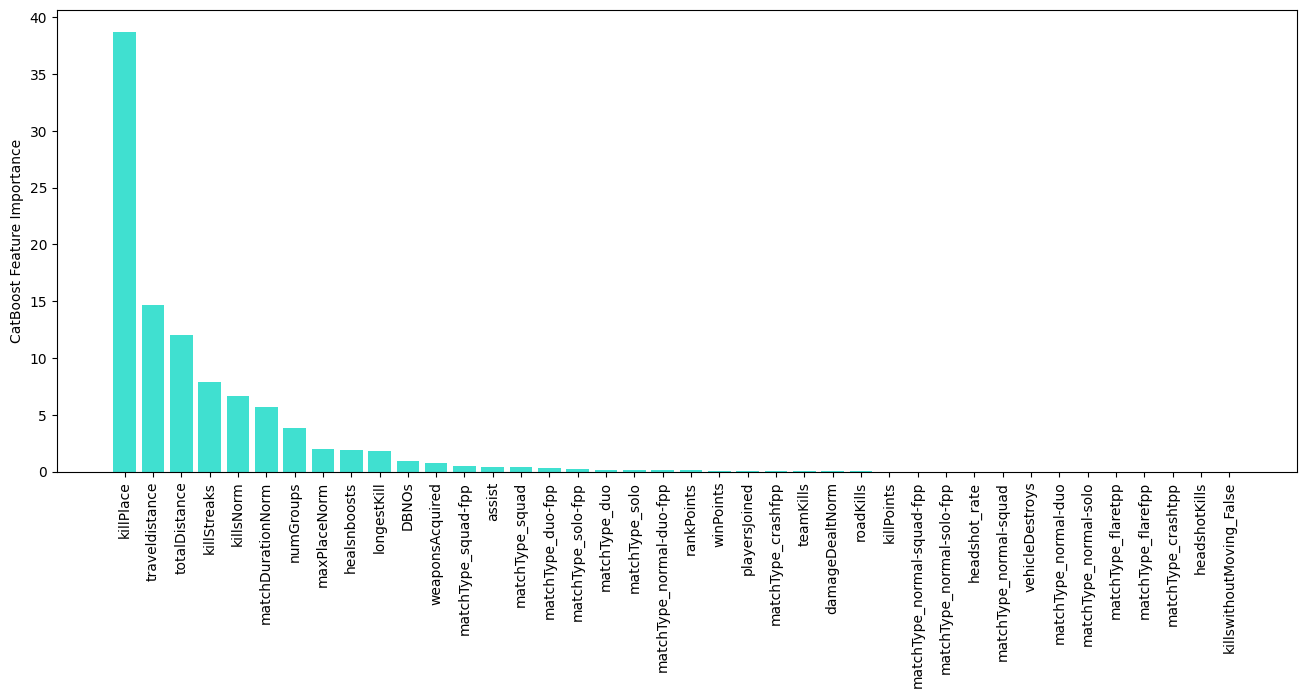

In [69]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

### **Prediction**

In [70]:
pred = model.predict(xtest)

In [71]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.09
R2: 0.92


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>

## **Inference**
+ RMSE (Root Mean Squared Error): 0.09: This indicates that the average difference between the predicted values and the actual values is quite low. A lower RMSE value generally signifies a better fit of the model to the data.

+ R² (R-squared): 0.92: This suggests that 92% of the variance in the dependent variable is explained by the independent variables in the model. An R² value close to 1 indicates a strong correlation and that the model explains most of the variability in the response data.

##**Conclusion :**

### *The model appears to be performing very well. The low RMSE indicates high accuracy, and the high R² value suggests that the model explains a significant portion of the variance in the data. This means the model is likely making precise predictions and capturing the underlying patterns effectively.*

Complete project on GitHub: https://github.com/Mohitupadhyay-ds/BGMI-Game-Prediction-using-CatBoost-Model

**Thank you!**